# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [96]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [97]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [98]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indexes = [39, 29, 28]
# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indexes], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,56159,555,902,10002,212,2916
1,43088,2100,2609,1200,1107,823
2,4113,20484,25957,1158,8604,5206


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?
    - 1 could be a fresh market, buying a lot more fresh food (vegetables, fruits) than the other items (frozen mainly, who is expected to be low)
    - 2 could be a market, since the items purchase costs are fairly equally distributed, as is expected (a market should sell a great diversity of items)
    - 3 could be a coffee shop, since it buys a lot of milk, above the average (needed to mix with the coffee served), and a proportionally large amount of delicatessen (coffee shop clients use to buy deli items to eat while drinking coffee)

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

Yes, the mean values are helpful to give hints about the nature of the establishment, but not alone. Comparing each  sample item purchase cost only to the mean does not help when the establishments' sizes are not of the same magnitude (lets say, a vast and huge supermarket compared to a mini-market run by a family). To ilustrate that, lets look at one case: a large supermarket could purchase a lot of milk compared to the mean, but proportionaly to its own other purchases, its not a lot, its just average. Since this absolute value is far above the mean, we could be inclined to say it's a coffee shop (a lot of milk needed), when in fact it's not the case. So, we must look to the items purchase costs proportion in each sample to help in discovering the nature of the establishment.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [99]:
#NOTE: Im curious about the predictability of all features, so instead of dropping just one
# I will get the score by dropping all of them, each at a time
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
r_st=0
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
for feature in data.columns:
    new_data = data.drop([feature], axis = 1)
    # TODO: Split the data into training and testing sets(0.25) using the given feature as the target
    # Set a random state.
    X_train, X_test, y_train, y_test = train_test_split(new_data, data[feature], test_size=0.25, random_state=r_st)
    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=r_st)
    regressor.fit(X_train, y_train)
    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    #print 'Predicting feature {} in the dataset gives a score of {}'.format(feature, score)
    print 'Feature: {} | Score: {}'.format(feature, score)

Feature: Fresh | Score: -0.252469807688
Feature: Milk | Score: 0.365725292736
Feature: Grocery | Score: 0.602801978878
Feature: Frozen | Score: 0.253973446697
Feature: Detergents_Paper | Score: 0.728655181254
Feature: Delicatessen | Score: -11.6636871594


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**
* Which feature did you attempt to predict?
 - All of them.
* What was the reported prediction score?
    - Feature: Fresh | Score: -0.252469807688
    - Feature: Milk | Score: 0.365725292736
    - Feature: Grocery | Score: 0.602801978878
    - Feature: Frozen | Score: 0.253973446697
    - Feature: Detergents_Paper | Score: 0.728655181254
    - Feature: Delicatessen | Score: -11.6636871594

* Is this feature necessary for identifying customers' spending habits?

 Considering necessary a feature presenting a score bellow 0.5 (hard to predict, then relevant):
    - Feature: Fresh | Necessary: YES
    - Feature: Milk | Necessary: YES
    - Feature: Grocery | Score: Necessary: NO
    - Feature: Frozen | Necessary: YES
    - Feature: Detergents_Paper | Necessary: NO
    - Feature: Delicatessen | Necessary: YES

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

/home/b40153/github/udacity_ml_env/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


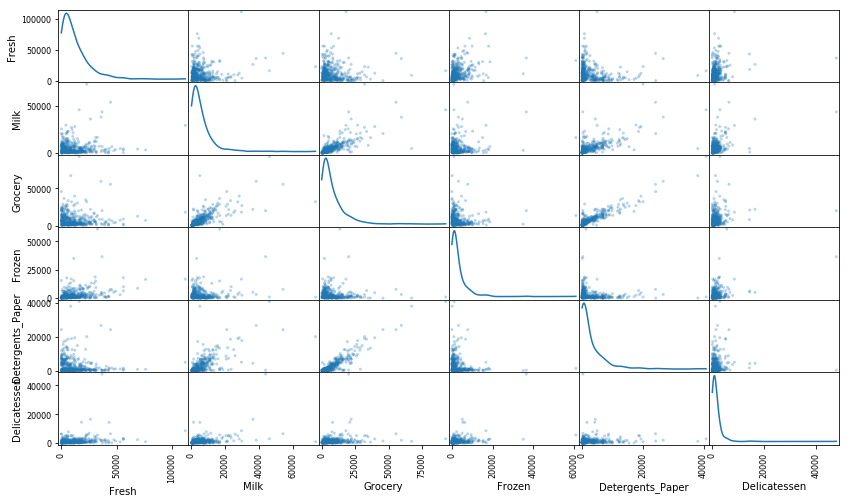

In [100]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**

* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
 - The scatter matrix shows the vast majority of data lying in the right of the mean(instead of equally distributed to both sides), a lot of outliers (points that are far away from average), a large number of points near 0, factors that indicate it is not normally distributed.
 
* Are there any pairs of features which exhibit some degree of correlation?
 - Yes. The more evident pairs are:
     - Grocery/Delicatessen
     - Grocery/Detergents_Paper
     - Grocery/Milk
     - Detergents_Paper/Milk
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict?
 - It confirms. I predicted that Detergents_Paper and Grocery were not that relevant (they were somewhat predictable), and this was confirmed by the scatter matrix showing the high correlation that they have with other features. 
* How is the data for those features distributed?
    - The data for those features show a high correlation with some other features (which implies some predictability)

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

/home/b40153/github/udacity_ml_env/lib/python2.7/site-packages/ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


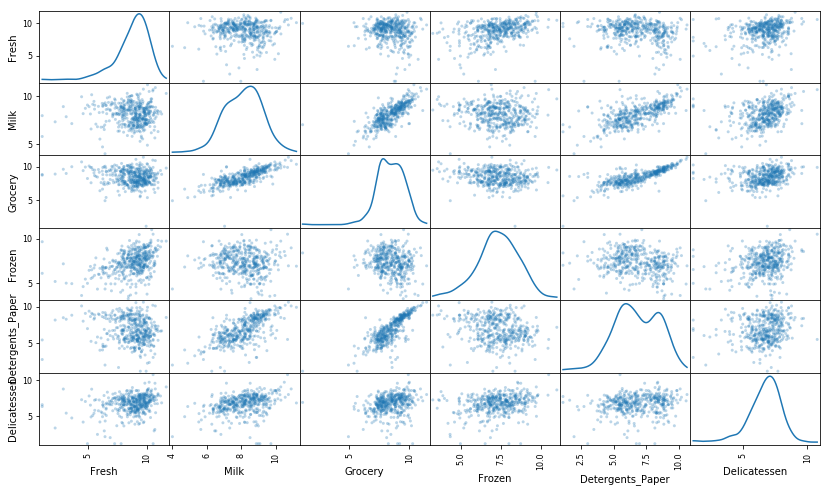

In [101]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [102]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.935942,6.318968,6.804615,9.210540,5.356586,7.977968
1,10.671000,7.649693,7.866722,7.090077,7.009409,6.712956
2,8.321908,9.927399,10.164197,7.054450,9.059982,8.557567


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [103]:
outliers_pd = pd.DataFrame()
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    outliers_pd = outliers_pd.append(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = outliers_pd.index.get_duplicates()
print 'Multiple features outliers indexes: {}'.format(outliers)
print 'Multiple features outliers:'
display(log_data.iloc[outliers])

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Multiple features outliers indexes: [65, 66, 75, 128, 154]
Multiple features outliers:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**
* Are there any data points considered outliers for more than one feature based on the definition above?
    - Yes. In fact, there are 5 of them, at the indexes [65, 66, 75, 128, 154]
    
* Should these data points be removed from the dataset?
    - Yes.
* If any data points were added to the `outliers` list to be removed, explain why.
    - Since outliers generally add a sense of noise to a dataset, dificulting the understanding of its nature, and worsen the performance of classifiers (k-nn is a strong example), I think its a good idea to remove at least the worst cases of outliers (the ones present in more than one feature, i.e, a sample that has more than one dimension of outliers).

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

             Explained Variance   Fresh    Milk  Grocery  Frozen  \
Dimension 1              0.4430  0.1675 -0.4014  -0.4381  0.1782   
Dimension 2              0.2638 -0.6859 -0.1672  -0.0707 -0.5005   
Dimension 3              0.1231 -0.6774  0.0402  -0.0195  0.3150   
Dimension 4              0.1012 -0.2043  0.0128   0.0557  0.7854   
Dimension 5              0.0485 -0.0026  0.7192   0.3554 -0.0331   
Dimension 6              0.0204  0.0292 -0.5402   0.8205  0.0205   

             Detergents_Paper  Delicatessen  
Dimension 1           -0.7514       -0.1499  
Dimension 2           -0.0424       -0.4941  
Dimension 3           -0.2117        0.6286  
Dimension 4            0.2096       -0.5423  
Dimension 5           -0.5582       -0.2092  
Dimension 6           -0.1824        0.0197  
0.7068
0.9795999999999999


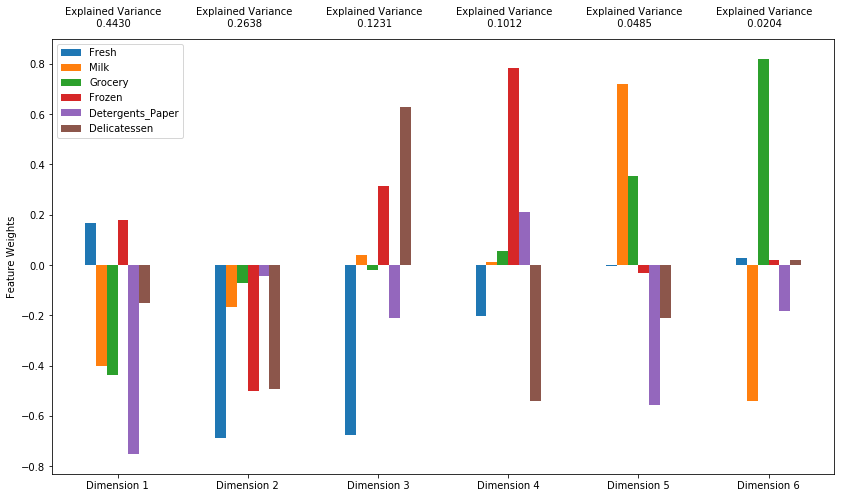

In [104]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(good_data)
# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)
print pca_results
print pca_results['Explained Variance'][0:2].sum()
print pca_results['Explained Variance'][0:5].sum()

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**
* How much variance in the data is explained* **in total** *by the first and second principal component?
    0.7068 (0.4430+0.2638)
* How much variance in the data is explained by the first four principal components?
    0.9795
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each,
stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.
  - First dimension: the most representative feature in terms of the module of the variance's weigth is by far Detergents_Paper, with 0.7514 (well represented); Milk(-0.4014) and Grocery(-0.4381) are fairly represented.
  - Second dimension: the most representative feature in terms of the module of the variance's weigth is by far Fresh, with 0.6859 (well represented);  Frozen(-0.5005) and Delicatessen(-0.4941) are fairly represented.
  - Third dimension: the most representative feature in terms of the module of the variance's weigth are Fresh(-0.6774) and Delicatessen (0.6286), both well represented.
  - Fourth dimension: the most representative feature in terms of the module of the variance's weigth is by far Frozen, with 0.7854 (well represented), followed by Delicatessen(-0.5423), fairly represented.
  
Considering the variance cumulative sum along the first 4 dimensions, 0.9795 (very close to 1), it seems we could well represent all the variance in the data by using just this 4 dimensions. We would not lose too much of data information by applying PCA and just retaining the first 4 dimensions.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [105]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,3.0426,-2.5854,0.1965,-0.0757,-1.4213,0.0093
1,0.5684,-1.0850,-1.4044,-0.5784,-0.6738,-0.2157
2,-3.5695,-0.9977,0.9477,-0.5400,0.2579,0.0323


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [106]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [107]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,3.0426,-2.5854
1,0.5684,-1.0850
2,-3.5695,-0.9977


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

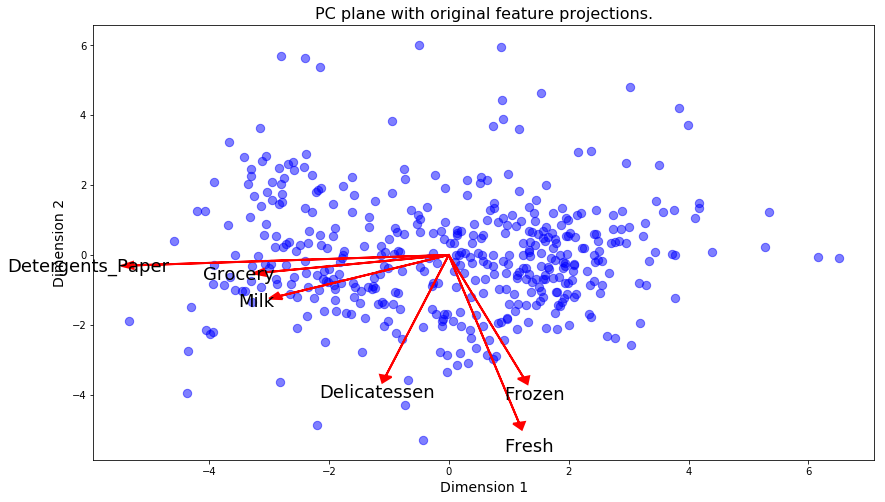

In [108]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

**Answer**

From the biplot, which of the original features are most strongly correlated with the first component?
    - Detergents_Paper
What about those that are associated with the second component?
    - Fresh (most associated of all), followed by Delicatessen an Frozen.   
Do these observations agree with the pca_results plot you obtained earlier?
    - Yes, they agree (the most relevant features in the first and second dimensions are the same)

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

K-means advantages (over Gaussian Mixture Model):
    - its simpler (based on euclidian distance)
    - its faster
    - it makes use of hard clustering (a point belongs or not to a particular cluster)

Gaussian Mixture Model advantages(over K-means):
    - its more flexible (K-means is a particular case of GMM)
    - can handle hidden, not observable parameters
    - makes use of soft clustering (giving probabilities of any point belonging to any cluster)

K-means is a particular case of GMM, where the probabilities of each point belonging to a cluster is 1 for the cluster where its centroid is closer to the point and zero to the other clusters. It has the advantage of being simple and fast, but it lacks generality, and sometimes it is not apropriate, specially in the case when clusters are not hyperspherical (i.e, not easily separable by using euclidian distance as a metric). Since our data seems not separable by K-means, presenting hidden parameters (features are in some degree correlated with each other), I think in this case the best choice seems to be using GMM as a model.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [109]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn import mixture
from sklearn.metrics import silhouette_score

def return_best_cluster(range_list):
    best_score = -2
    best_prediction = None
    for n_clusters in range_list:
        clusterer = mixture.GaussianMixture(n_components=n_clusters, random_state=0).fit(reduced_data)
        # TODO: Predict the cluster for each data point
        preds = clusterer.predict(reduced_data)
        # TODO: Find the cluster centers
        centers = clusterer.means_
        # TODO: Predict the cluster for each transformed sample data point
        sample_preds = clusterer.predict(pca_samples)
        # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
        score = silhouette_score(reduced_data, preds)
        if score > best_score:
            best_score = score
            best_prediction = preds
            best_centers = centers
        print 'Silhouette score for {} clusters: {}'.format(n_clusters, score)
    return best_prediction, best_centers, sample_preds 
preds, centers, sample_preds = return_best_cluster(range(2,30))

Silhouette score for 2 clusters: 0.421916846463
Silhouette score for 3 clusters: 0.37420184754
Silhouette score for 4 clusters: 0.3290804667
Silhouette score for 5 clusters: 0.305874552873
Silhouette score for 6 clusters: 0.224815181533
Silhouette score for 7 clusters: 0.274333813489
Silhouette score for 8 clusters: 0.344370057027
Silhouette score for 9 clusters: 0.334323885363
Silhouette score for 10 clusters: 0.340631655305
Silhouette score for 11 clusters: 0.319715768618
Silhouette score for 12 clusters: 0.321553333821
Silhouette score for 13 clusters: 0.314613172247
Silhouette score for 14 clusters: 0.341092603199
Silhouette score for 15 clusters: 0.35607218373
Silhouette score for 16 clusters: 0.324463762903
Silhouette score for 17 clusters: 0.311887765677
Silhouette score for 18 clusters: 0.30628530637
Silhouette score for 19 clusters: 0.316675535672
Silhouette score for 20 clusters: 0.319967847192
Silhouette score for 21 clusters: 0.277712078772
Silhouette score for 22 clusters:

### Question 7

* Report the silhouette score for several cluster numbers you tried.
* Of these, which number of clusters has the best silhouette score?

**Answer:**

* Report the silhouette score for several cluster numbers you tried.

    - Silhouette score for 2 clusters: 0.421916846463
    - Silhouette score for 3 clusters: 0.37420184754
    - Silhouette score for 4 clusters: 0.3290804667
    - Silhouette score for 5 clusters: 0.305874552873
    - Silhouette score for 6 clusters: 0.224815181533
    - Silhouette score for 7 clusters: 0.274333813489
    - Silhouette score for 8 clusters: 0.344370057027
    - Silhouette score for 9 clusters: 0.334323885363
    - Silhouette score for 10 clusters: 0.340631655305
    - Silhouette score for 11 clusters: 0.319715768618
    - Silhouette score for 12 clusters: 0.321553333821
    - Silhouette score for 13 clusters: 0.314613172247
    - Silhouette score for 14 clusters: 0.341092603199
    - Silhouette score for 15 clusters: 0.35607218373
    - Silhouette score for 16 clusters: 0.324463762903
    - Silhouette score for 17 clusters: 0.311887765677
    - Silhouette score for 18 clusters: 0.30628530637
    - Silhouette score for 19 clusters: 0.316675535672
    - Silhouette score for 20 clusters: 0.319967847192
    - Silhouette score for 21 clusters: 0.277712078772
    - Silhouette score for 22 clusters: 0.27106212479
    - Silhouette score for 23 clusters: 0.276268807763
    - Silhouette score for 24 clusters: 0.293560820579
    - Silhouette score for 25 clusters: 0.298796767205
    - Silhouette score for 26 clusters: 0.290800770923
    - Silhouette score for 27 clusters: 0.290768848152
    - Silhouette score for 28 clusters: 0.301303878352
    - Silhouette score for 29 clusters: 0.312327128433

* Of these, which number of clusters has the best silhouette score?
     - 2 clusters.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

Silhouette score for 4 clusters: 0.3290804667
Silhouette score for 9 clusters: 0.334323885363
Silhouette score for 10 clusters: 0.340631655305
Silhouette score for 5 clusters: 0.305874552873
Silhouette score for 2 clusters: 0.421916846463


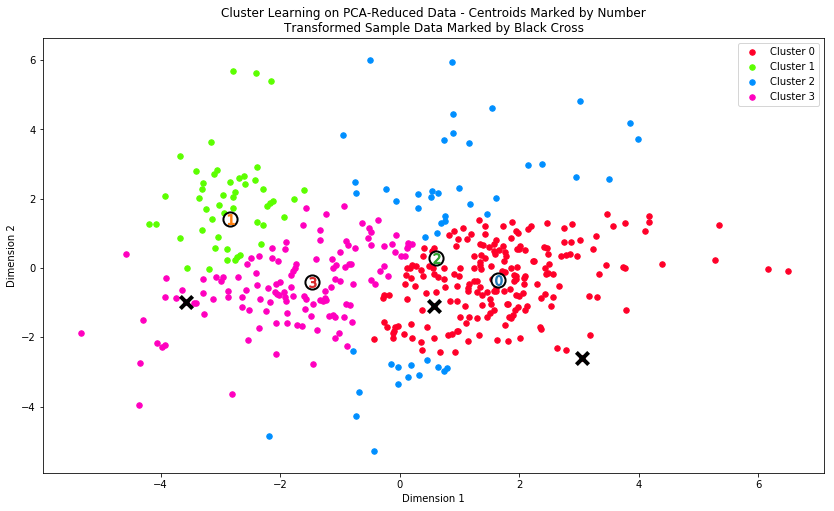

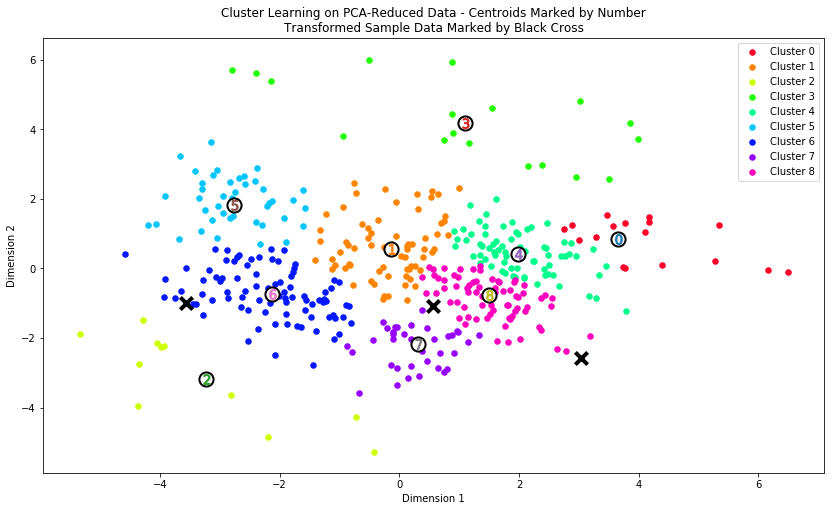

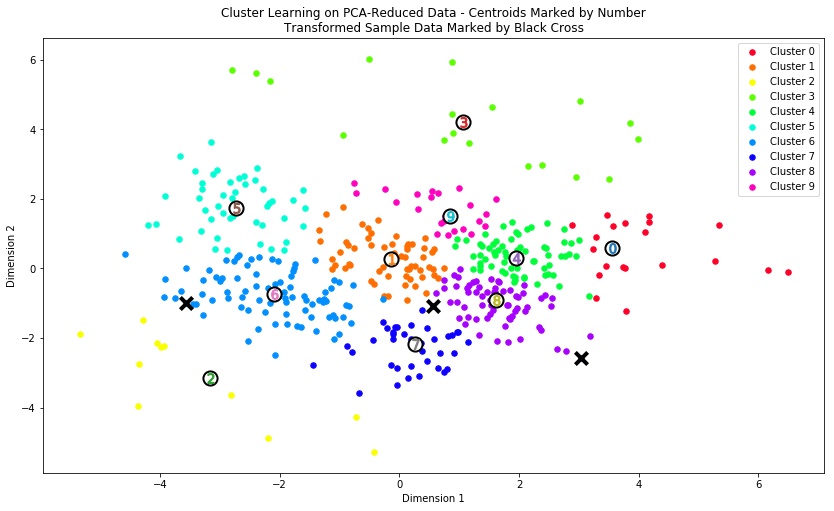

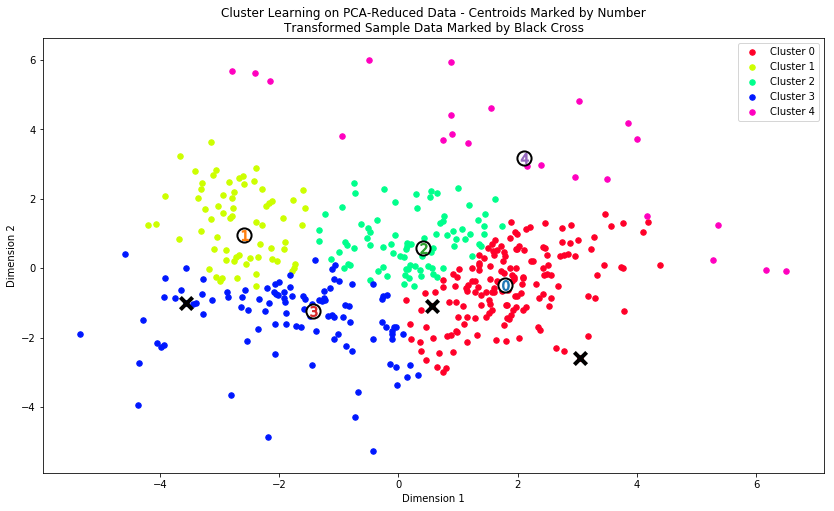

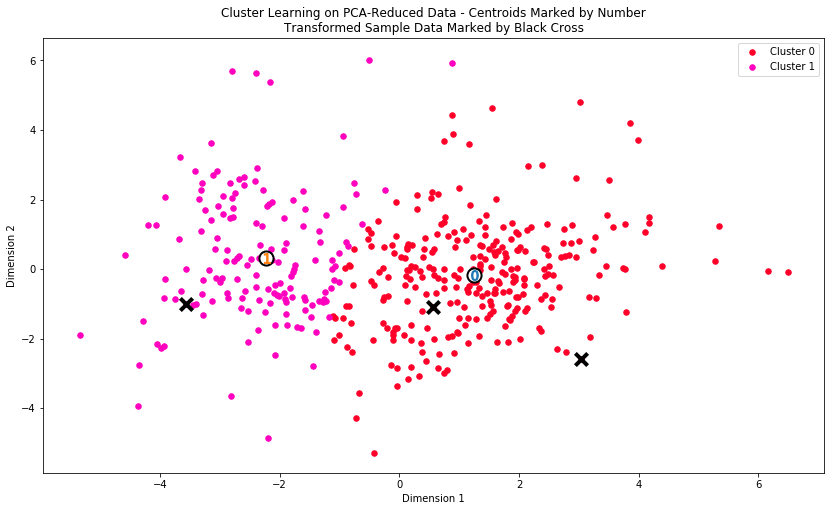

In [110]:
# Experimenting with various cluster's numbers:
for i in [4, 9, 10, 5, 2]:
    preds, centers, sample_preds = return_best_cluster([i])
    vs.cluster_results(reduced_data, preds, centers, pca_samples)

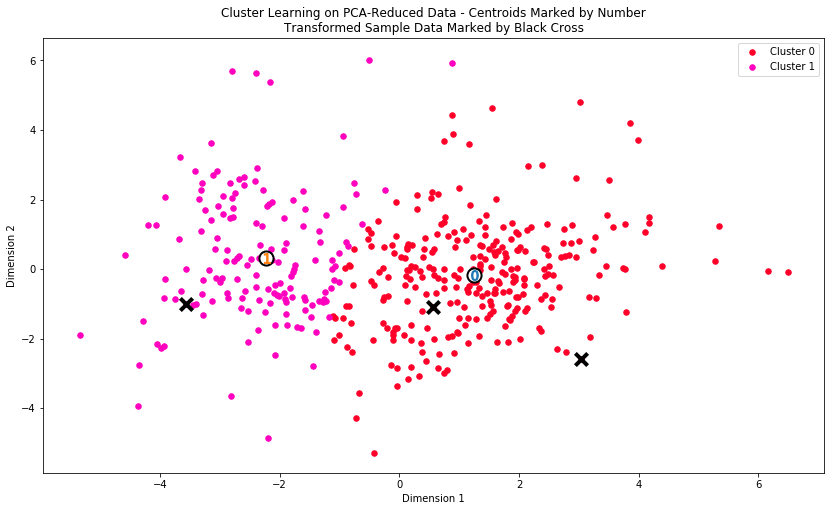

In [111]:
# Displaying the results of the clustering from implementation, for the the optimal number of clusters (2)
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [112]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers) 

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8953.0,2114.0,2765.0,2075.0,353.0,732.0
Segment 1,3552.0,7837.0,12219.0,870.0,4696.0,962.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

Back to the means:

| |	Fresh |	Milk |	Grocery |	Frozen |	Detergents_Paper |	Delicatessen |
|:-------------:| ------------- |:-------------:| -----:| -----:| -----:| -----:|
|**mean**| 	12000.297727 |	5796.265909 |	7951.277273 |	3071.931818 |	2881.493182 |	1524.870455 |
|**Segment 0 **| 		8953.0 |	2114.0  | 	2765.0 	 | 2075.0  | 	353.0 	 | 732.0 | 
|**Segment 1 **| 	 	3552.0 | 7837.0  | 	12219.0  | 	870.0  | 4696.0  | 	962.0 | 



**Segment 1** could indicate a sort of coffee/restaurant establishment, since it is characterized by above average purchases of Milk(to mix with coffee), Grocery(for meals) and Detergents_Paper(napkins/toilet paper).

**Segment 0** is harder to tell, since its bellow average in all items. However, since it has proportionally more Fresh purchases than the other items and seems to be more balanced between the features, it could be a sort of market/fresh fruit store, small in size due to purchases being bellow the average.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [113]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


**Answer:**

* For each sample point, which customer segment from* **Question 8** *best represents it?

    From the **Question 1** answer:
    - sample point 1 could be a fresh market
    - sample point 2 could be a market
    - sample point 3 could be a coffee shop


* Are the predictions for each sample point consistent with this?
    - sample point 1 prediction: not consistent (fresh market X predicted coffee/restaurant)
    - sample point 2 prediction: consistent
    - sample point 3 prediction: consistent


## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

We expect that customers which belong to a cluster share some common characteristics. So, we can at first take a portion of total customers, lets say 10%, equally divided between clusters. Then, we use these small groups to test the new delivery service (from 5 to 3 days a week), observing how each group react (positively or negatively). Finally, we are able to spread the new delivery service to the whole clusters that reacted positively to the change, and mantain the old delivery service to the ones that reacted negatively.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

From the clusters obtained in the unsupervised learning step above, we can easily derive a supervised learning, by using the new obtained segments as labeled data. The training part of supervised learning will be done using the same features as in the unsupervised learning step, and the segments (clusters) associated to each data point will be used as the labels. From now, each new customer will be tested against this new trained supervised model, by using its features to predict the target variable (the customer segments discovered in the unsupervised learning step).

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

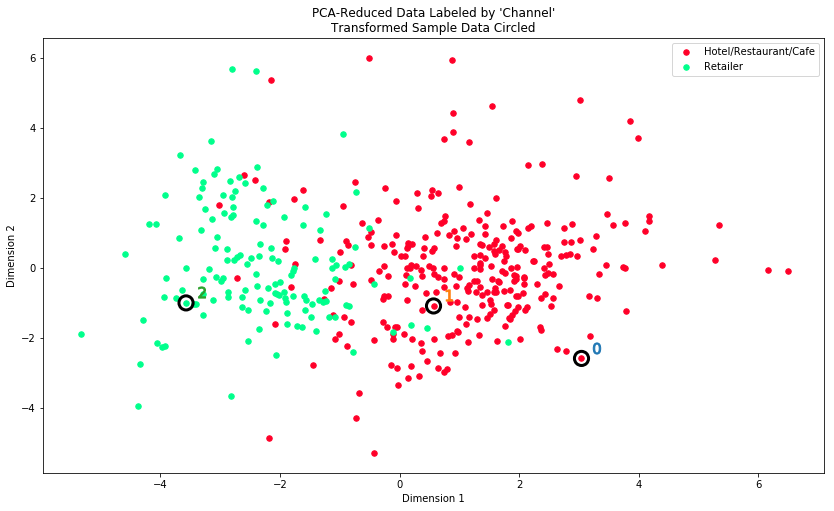

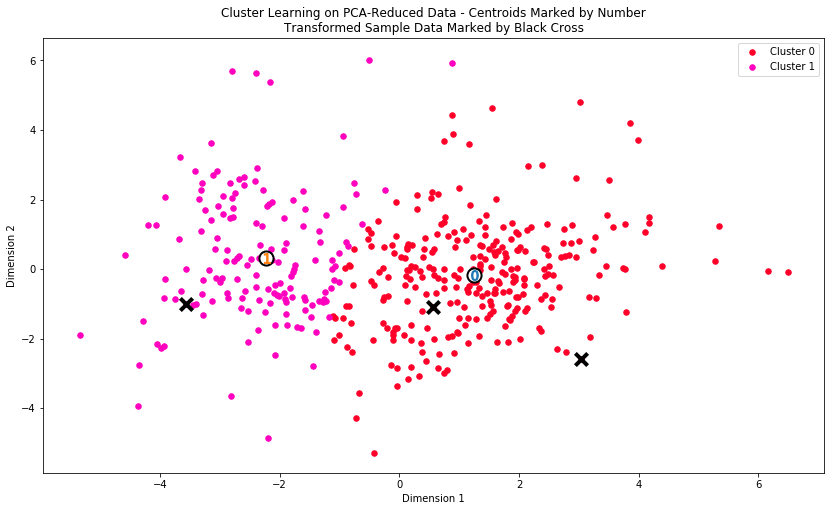

In [114]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)
# Re-Display the clustering results for comparision
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

The clustering algorithm did a nice job, dividing the data in two clusters, the same number of the underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers, and correctly associating each point to its cluster, specially when considering the points to the extreme left and the extreme right. Some points near the intersection between the clusters does not correspond to the distribution of Hotel/Restaurant/Cafe customers to Retailer customers though (i.e, the points of Hotel/Restaurant/Cafe which lies in the Retailer 'cloud' and vice-versa; maybe this mismatching is due to the fact that the clustering algorithm 'smooths' that 'intruders' out by associating them to the closest centroid of each cluster).

These classifications are consistent with my previous definition of customer segment: "Hotel/Restaurant/Cafe" is very similar to "coffee/restaurant", and "Retailers" agrees with "market/fresh fruit store, small in size", since "market/fresh fruit store, small in size" could be classified a a particular case of retailer.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.